# Figures for the AGU presentation

In [1]:
import discretize
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
plt.style.use('seaborn-talk')

## Load section and survey

In [3]:
with np.load('../../model-marlim/marlim_sections.npz') as d:
    res_h = d['res_h']
    res_v = d['res_v']

    mesh = discretize.TensorMesh([d['hx'], d['hy'], d['hz']], x0=d['x0'])

data = xr.load_dataset('../../model-marlim/marlim_data.nc', engine='h5netcdf')

## Figure

/home/dtr/anaconda3/lib/python3.8/site-packages/discretize/utils/code_utils.py:129: FutureWarning: TensorMesh.vectorNx has been deprecated, please use TensorMesh.nodes_x. It will be removed in version 1.0.0 of discretize.
  warnings.warn(message, FutureWarning)
/home/dtr/anaconda3/lib/python3.8/site-packages/discretize/utils/code_utils.py:129: FutureWarning: TensorMesh.vectorNz has been deprecated, please use TensorMesh.nodes_z. It will be removed in version 1.0.0 of discretize.
  warnings.warn(message, FutureWarning)
<ipython-input-4-12d27353918e>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


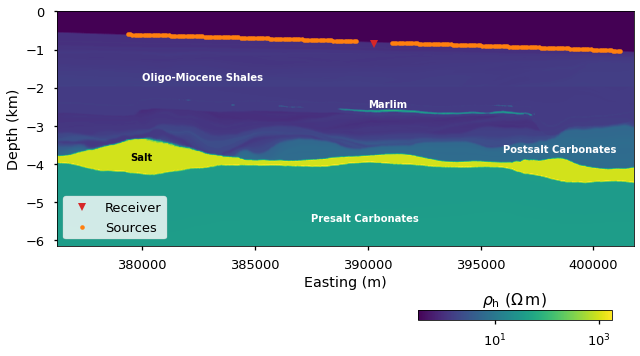

In [4]:
# Initiate figure.
fig, ax = plt.subplots(figsize=(9, 4.5))

# Plot resistivity and anisotropy
cb = ax.pcolormesh(mesh.vectorNx, mesh.vectorNz/1e3,
                   res_h.T, rasterized=True, norm=LogNorm())

# Add survey.
ax.plot(data.attrs['rec_x'], data.attrs['rec_z']/1e3, 'C3v', ms=8, label='Receiver')
ax.plot(data.src_x[::2], data.data_il.attrs['src_z']/1e3, 'C1.', label=f"Sources")

# Titles, labels, colorbar.
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Depth (km)')


# Annotations.
ax.annotate('Oligo-Miocene Shales', (380000, -1.8), color='w', fontweight='bold')
ax.annotate('Marlim', (390000, -2.5), color='w', fontweight='bold')
ax.annotate('Postsalt Carbonates', (396000, -3.7), color='w', fontweight='bold')
ax.annotate('Salt', (379500, -3.9), fontweight='bold')
ax.annotate('Presalt Carbonates', (387500, -5.5), color='w', fontweight='bold')

ax.legend()

# Finish and save.
fig.tight_layout(rect=[0, 0.06, 1, 1])

cbaxes = fig.add_axes([0.65, 0, 0.3, 0.03]) 
c = fig.colorbar(cb, ax=ax, cax=cbaxes, orientation='horizontal')
c.ax.set_title(r'$\rho_\mathrm{h}~(\Omega\,$m)')

plt.savefig(f'../figures/model-marlim.pdf', bbox_inches='tight')
fig.show()

In [5]:
import scooby
scooby.Report(['xarray', 'discretize', 'h5netcdf'])

--------------------------------------------------------------------------------
  Date: Fri Nov 20 16:16:42 2020 CET

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GB
       Environment : Jupyter

  Python 3.8.6 | packaged by conda-forge | (default, Oct  7 2020, 19:08:05)
  [GCC 7.5.0]

            xarray : 0.16.1
        discretize : 0.6.1
          h5netcdf : 0.8.1
             numpy : 1.19.2
             scipy : 1.5.3
           IPython : 7.16.1
        matplotlib : 3.3.3
            scooby : 0.5.6

  Intel(R) Math Kernel Library Version 2020.0.1 Product Build 20200208 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------